In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

# Model
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
#metric
from sklearn.metrics import accuracy_score, confusion_matrix

# Prepare Data

Following figure shows how to split data to train model in XGBoost and Neural Net.

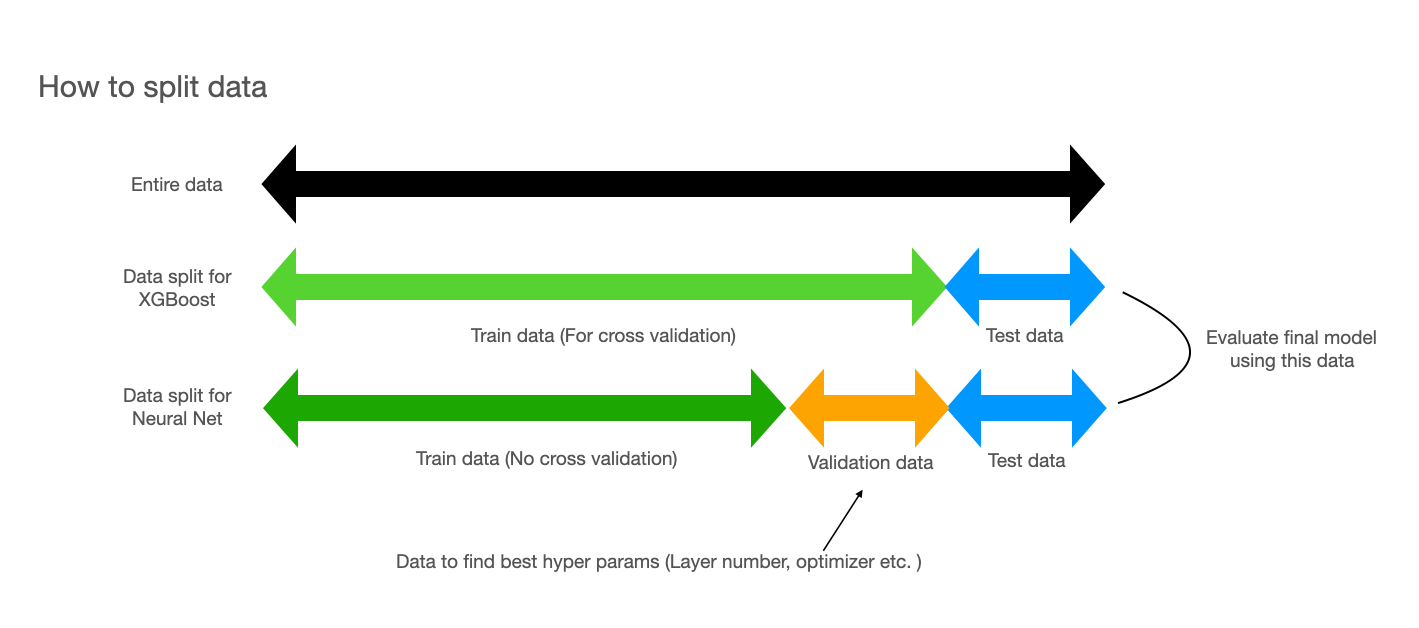

In [14]:
# Load data
npz = np.load('./my_comp_train_XY.npz')
X_raw = npz['X']
y_raw = npz['y']

# Scale X data into range 0.0 to 1.0 and flatten image
X_raw = (X_raw / 255.).reshape(-1, 28*28)
y_raw = y_raw.reshape(-1,1)

In [15]:
# Split data into train and valid set
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, 
                                                      shuffle=True, test_size=0.25, stratify=y_raw)
print("Train data shape, X_train.shape:{} y_train.shape:{}".format(X_train.shape, y_train.shape))
print("Test data shape, X_test.shape:{} y_test.shape:{}".format(X_test.shape, y_test.shape))

Train data shape, X_train.shape:(34107, 784) y_train.shape:(34107, 1)
Test data shape, X_test.shape:(11370, 784) y_test.shape:(11370, 1)


**Data for XGBoost**

In [16]:
# Train data for xgb. (Simply copy original data)
X_train_xgb = X_train.copy()
y_train_xgb = y_train.copy()

**Data for Neural Network**

In [17]:
# Train data for Neural Network
X_train_nn, X_valid_nn, y_train_nn, y_valid_nn = train_test_split(
    X_train,
    y_train,
    shuffle=True,
    test_size=0.2,
    stratify=y_train)

print("Train_nn data shape, X_train_nn.shape:{} y_train_nn.shape:{}".format(X_train_nn.shape, y_train_nn.shape))
print("Valid_nn data shape, X_valid_nn.shape:{} y_valid_nn.shape:{}".format(X_valid_nn.shape, y_valid_nn.shape))

Train_nn data shape, X_train_nn.shape:(27285, 784) y_train_nn.shape:(27285, 1)
Valid_nn data shape, X_valid_nn.shape:(6822, 784) y_valid_nn.shape:(6822, 1)


# XGBoost

## Base line model

In [18]:
xgb_base = XGBClassifier()

In [19]:
xgb_base.fit(X_train_xgb, y_train_xgb)

/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

[10:59:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1,
       tree_method='exact', use_label_encoder=True, validate_parameters=1,
       verbosity=None)

In [21]:
y_pred_train_xgb = xgb_base.predict(X_train_xgb)
print(accuracy_score(y_pred_train_xgb, y_train_xgb))
confusion_matrix(y_pred_train_xgb, y_train_xgb)

1.0


array([[3110,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 2528,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 4021,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 3678,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 3067,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 2439,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 3994,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 3759,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 4388,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 3123]])

Over fitting...?

## Grid search

### n_estimators

In [24]:
param_grid = {
    "n_estimators": [10, 30, 50]
}

xgb_gs_cv = GridSearchCV(XGBClassifier(), param_grid=param_grid,
                         cv=3, n_jobs=-1, verbose=1)
xgb_gs_cv.fit(X_train_xgb, y_train_xgb)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 33.0min finished
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12

[11:56:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w...e,
       tree_method=None, use_label_encoder=True, validate_parameters=None,
       verbosity=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 30, 50]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=1)

In [25]:
xgb_gs_cv.cv_results_

/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set retur

{'mean_fit_time': array([ 302.12053219, 1070.03177913,  929.33173021]),
 'std_fit_time': array([  0.87085886,  21.47809356, 318.05670666]),
 'mean_score_time': array([1.07026172, 0.67820764, 0.46894709]),
 'std_score_time': array([0.01366131, 0.0298625 , 0.20229101]),
 'param_n_estimators': masked_array(data=[10, 30, 50],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10}, {'n_estimators': 30}, {'n_estimators': 50}],
 'split0_test_score': array([0.93097081, 0.95779107, 0.96421034]),
 'split1_test_score': array([0.93429501, 0.96156214, 0.96727944]),
 'split2_test_score': array([0.92847088, 0.95759282, 0.96313567]),
 'mean_test_score': array([0.93124579, 0.95898203, 0.96487525]),
 'std_test_score': array([0.00238548, 0.00182621, 0.00175573]),
 'rank_test_score': array([3, 2, 1], dtype=int32),
 'split0_train_score': array([0.97290521, 0.99903233, 1.        ]),
 'split1_train_score': array([0.97348052, 0.99876858, 

In [26]:
xgb_gs_cv.best_score_

0.9648752455507668

In [27]:
xgb_gs_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=50, n_jobs=4, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1,
       tree_method='exact', use_label_encoder=True, validate_parameters=1,
       verbosity=None)

# Neural Network

In [30]:
INPUT_SIZE = 28 * 28
OUTPUT_SIZE = 10

In [34]:
# Fix epochs and batch_size
epochs = 10
batch_size = 32

In [33]:
validaton_data = (X_valid_nn, y_valid_nn)

## Practice model

In [31]:
nn_clf_v1 = keras.models.Sequential([
    layers.Dense(300, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(OUTPUT_SIZE, activation="softmax")
])

In [39]:
nn_clf_v1.compile(loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"],
                  optimizer="Adam")

In [40]:
early_stoping = EarlyStopping(monitor='val_loss', patience=1)

history_v1 = nn_clf_v1.fit(X_train_nn, y_train_nn,
                           epochs=epochs, 
                           batch_size=batch_size,
                           validation_data=validaton_data,
                           callbacks=[early_stoping])

Epoch 1/10
853/853 [==============================] - 2s 2ms/step - loss: 0.2883 - accuracy: 0.9143 - val_loss: 0.1524 - val_accuracy: 0.9554
Epoch 2/10
853/853 [==============================] - 2s 2ms/step - loss: 0.1179 - accuracy: 0.9643 - val_loss: 0.1281 - val_accuracy: 0.9614
Epoch 3/10
853/853 [==============================] - 2s 2ms/step - loss: 0.0731 - accuracy: 0.9766 - val_loss: 0.1192 - val_accuracy: 0.9667
Epoch 4/10
853/853 [==============================] - 2s 2ms/step - loss: 0.0537 - accuracy: 0.9841 - val_loss: 0.1095 - val_accuracy: 0.9694
Epoch 5/10
853/853 [==============================] - 2s 2ms/step - loss: 0.0364 - accuracy: 0.9878 - val_loss: 0.1124 - val_accuracy: 0.9700


In [42]:
train_loss, valid_loss = history_v1.history["loss"], history_v1.history["val_loss"]
train_acc, valid_acc = history_v1.history["accuracy"], history_v1.history["val_accuracy"]

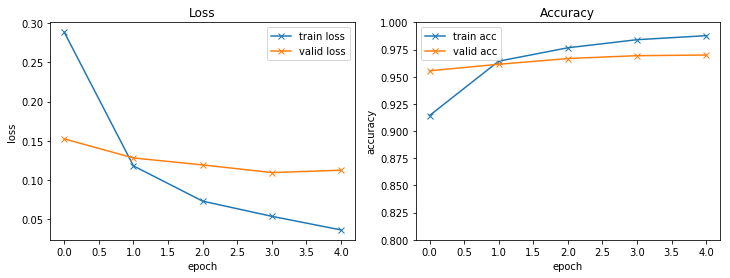

In [61]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(range(len(train_loss)), train_loss, "-x", label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, "-x", label="valid loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.title("Loss")

plt.subplot(122)
plt.plot(range(len(train_acc)), train_acc, "-x", label="train acc")
plt.plot(range(len(valid_acc)), valid_acc, "-x", label="valid acc")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.ylim([0.8, 1.0])
plt.legend()
plt.title("Accuracy")

plt.show()

## Search multiple hyper param

In [70]:
def build_model(hidden_layers, optimizer="Adam"):
    """ Build model with 10 output """
    model = models.Sequential()
    for hidden_layer in hidden_layers:
        model.add(layers.Dense(hidden_layer, activation="relu"))
    model.add(layers.Dense(OUTPUT_SIZE, activation="softmax"))
    
    model.compile(loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"], 
                  optimizer=optimizer)
    return model

In [65]:
def train_model(model):
    """ Function to train model. Train data, epochs, batch_size are fixed. """
    early_stoping = EarlyStopping(monitor='val_loss', patience=1)
    
    history = model.fit(X_train_nn, y_train_nn,
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_data=validaton_data,
                        callbacks=[early_stoping])
    return history

In [73]:
def build_and_train_model(hidden_layers, optimizer="Adam"):
    """ Conbine building and training model """
    model = build_model(hidden_layers, optimizer)
    history = train_model(model)
    return history, model

In [68]:
def plot_history(history):
    """ Plot result of hitory """
    train_loss, valid_loss = history.history["loss"], history.history["val_loss"]
    train_acc, valid_acc = history.history["accuracy"], history.history["val_accuracy"]
    
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(range(len(train_loss)), train_loss, "-x", label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, "-x", label="valid loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend()
    plt.title("Loss")

    plt.subplot(122)
    plt.plot(range(len(train_acc)), train_acc, "-x", label="train acc")
    plt.plot(range(len(valid_acc)), valid_acc, "-x", label="valid acc")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.ylim([0.8, 1.0])
    plt.legend()
    plt.title("Accuracy")

    plt.show()

In [86]:
def train_models(params):
    result = []
    for hidden_layers, optimizer in params:
        if optimizer is None:
            optimizer = "Adam"
        history, model = build_and_train_model(hidden_layers, optimizer) 
        
        y_pred_valid = model.predict_classes(X_valid_nn)
        val_accuracy = accuracy_score(y_valid_nn, y_pred_valid)
        model_summary = {
            "param" : {"hidden_layers": hidden_layers, "Optimizer": optimizer},
            "history": history,
            "model": model,
            "val_accuracy": val_accuracy
        }
        result.append(model_summary)
    return result

### First try

In [79]:
# Hyper params. Elements represents ("hidden layer structure", "optimizer name")
params = [
    ([300, 100], None),
    ([300, 50], None),
    ([500, 300, 100], None),
    ([100, 50, 30], None)]

In [81]:
result = train_models(params)

Epoch 1/10
853/853 [==============================] - 2s 3ms/step - loss: 0.2884 - accuracy: 0.9158 - val_loss: 0.1582 - val_accuracy: 0.9535
Epoch 2/10
853/853 [==============================] - 2s 2ms/step - loss: 0.1151 - accuracy: 0.9646 - val_loss: 0.1421 - val_accuracy: 0.9554
Epoch 3/10
853/853 [==============================] - 2s 2ms/step - loss: 0.0763 - accuracy: 0.9762 - val_loss: 0.1047 - val_accuracy: 0.9694
Epoch 4/10
853/853 [==============================] - 2s 2ms/step - loss: 0.0563 - accuracy: 0.9828 - val_loss: 0.1003 - val_accuracy: 0.9710
Epoch 5/10
853/853 [==============================] - 2s 2ms/step - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.1232 - val_accuracy: 0.9679
Epoch 1/10
853/853 [==============================] - 2s 2ms/step - loss: 0.3046 - accuracy: 0.9103 - val_loss: 0.1639 - val_accuracy: 0.9527
Epoch 2/10
853/853 [==============================] - 2s 2ms/step - loss: 0.1197 - accuracy: 0.9650 - val_loss: 0.1288 - val_accuracy: 0.9631
Epoch 

In [82]:
result

[{'param': {'hidden_layers': [300, 100], 'Adam': 'Adam'},
  'history': <tensorflow.python.keras.callbacks.History at 0x7f944f5e66d8>,
  'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f9462af8518>,
  'val_accuracy': 0.9678979771328057},
 {'param': {'hidden_layers': [300, 50], 'Adam': 'Adam'},
  'history': <tensorflow.python.keras.callbacks.History at 0x7f944ea9a438>,
  'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f94463b68d0>,
  'val_accuracy': 0.9651128701260627},
 {'param': {'hidden_layers': [500, 300, 100], 'Adam': 'Adam'},
  'history': <tensorflow.python.keras.callbacks.History at 0x7f9462678358>,
  'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f945c11a080>,
  'val_accuracy': 0.9649662855467604},
 {'param': {'hidden_layers': [100, 50, 30], 'Adam': 'Adam'},
  'history': <tensorflow.python.keras.callbacks.History at 0x7f94506ab4a8>,
  'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f944eb0bd30>,


### Second try

In [83]:
params_v2 = [
    ([300, 100], None),
    ([100, 50], None),
    ([50, 30], None),
    ([500, 300], None),
]

In [84]:
result_v2 = train_models(params_v2)

Epoch 1/10
853/853 [==============================] - 2s 3ms/step - loss: 0.2871 - accuracy: 0.9131 - val_loss: 0.1548 - val_accuracy: 0.9528
Epoch 2/10
853/853 [==============================] - 2s 2ms/step - loss: 0.1154 - accuracy: 0.9660 - val_loss: 0.1202 - val_accuracy: 0.9629
Epoch 3/10
853/853 [==============================] - 2s 2ms/step - loss: 0.0755 - accuracy: 0.9776 - val_loss: 0.1292 - val_accuracy: 0.9622
Epoch 1/10
853/853 [==============================] - 1s 2ms/step - loss: 0.3699 - accuracy: 0.8913 - val_loss: 0.2103 - val_accuracy: 0.9402
Epoch 2/10
853/853 [==============================] - 2s 2ms/step - loss: 0.1596 - accuracy: 0.9539 - val_loss: 0.1532 - val_accuracy: 0.9549
Epoch 3/10
853/853 [==============================] - 2s 2ms/step - loss: 0.1103 - accuracy: 0.9675 - val_loss: 0.1271 - val_accuracy: 0.9617
Epoch 4/10
853/853 [==============================] - 2s 2ms/step - loss: 0.0824 - accuracy: 0.9753 - val_loss: 0.1321 - val_accuracy: 0.9625
Epoch 

In [85]:
result_v2

[{'param': {'hidden_layers': [300, 100], 'Adam': 'Adam'},
  'history': <tensorflow.python.keras.callbacks.History at 0x7f9447b835f8>,
  'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f9447b3a710>,
  'val_accuracy': 0.9621811785400176},
 {'param': {'hidden_layers': [100, 50], 'Adam': 'Adam'},
  'history': <tensorflow.python.keras.callbacks.History at 0x7f9448161978>,
  'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f944ee903c8>,
  'val_accuracy': 0.9624743476986221},
 {'param': {'hidden_layers': [50, 30], 'Adam': 'Adam'},
  'history': <tensorflow.python.keras.callbacks.History at 0x7f9435d5d550>,
  'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f944827af28>,
  'val_accuracy': 0.9601289944297859},
 {'param': {'hidden_layers': [500, 300], 'Adam': 'Adam'},
  'history': <tensorflow.python.keras.callbacks.History at 0x7f9435beb160>,
  'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f94481b8ba8>,
  'val_acc

## Selecting Neural Network

Model performed highest validation accuracy was bellow<br>
{'hidden_layers': [300, 100], 'Optimizer': 'Adam'}

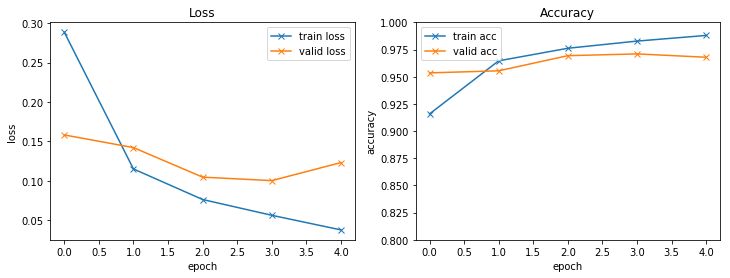

In [89]:
plot_history(result[0]["history"])

# Compare results

In [90]:
xgb_best = xgb_gs_cv.best_estimator_
y_pred_test_xgb = xgb_best.predict(X_test)

In [91]:
nn_best = result[0]["model"]
y_pred_test_nn = nn_best.predict_classes(X_test)

In [92]:
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
acc_test_nn = accuracy_score(y_test, y_pred_test_nn)

In [93]:
print("XGBoost accuracy: {}".format(acc_test_xgb))
print("Neural net accuracy: {}".format(acc_test_nn))

XGBoost accuracy: 0.969217238346526
Neural net accuracy: 0.9657871591908531


**Plain confusion matrix**

In [97]:
# Conf matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_test_xgb)
display(conf_matrix_xgb)

array([[1008,    0,    2,    0,    1,    2,    6,    0,   15,    2],
       [   0,  830,    7,    3,    0,    0,    1,    1,    1,    0],
       [   2,    2, 1300,    7,    5,    1,    2,    7,   11,    4],
       [   0,    3,   13, 1181,    2,    7,    0,    5,   10,    5],
       [   1,    3,    7,    1,  986,    1,    6,    1,    2,   14],
       [   3,    1,    4,    7,    3,  777,    8,    2,    4,    4],
       [   4,    0,    1,    1,    4,    7, 1303,    0,   12,    0],
       [   3,    6,   13,    4,    6,    0,    0, 1205,    2,   14],
       [   3,    3,    5,    4,    1,    8,    4,    0, 1425,   10],
       [   1,    0,    1,    6,   14,    0,    0,    8,    6, 1005]])

In [98]:
# Conf matrix for Neural net
conf_matrix_nn = confusion_matrix(y_test, y_pred_test_nn)
display(conf_matrix_nn)

array([[1016,    0,    6,    2,    0,    1,    4,    0,    6,    1],
       [   0,  829,    3,    2,    1,    0,    0,    1,    7,    0],
       [   1,    2, 1317,    4,    0,    1,    1,    1,   13,    1],
       [   1,    1,   10, 1180,    0,   11,    0,    8,   14,    1],
       [   3,    4,   11,    1,  971,    2,    6,    3,    4,   17],
       [   1,    0,    5,   19,    1,  771,    2,    0,    9,    5],
       [   7,    1,    6,    4,    2,    5, 1292,    0,   15,    0],
       [   4,    3,   20,    1,    5,    2,    0, 1197,   12,    9],
       [   1,    4,    9,   12,    1,    5,    2,    1, 1426,    2],
       [   4,    2,    1,    4,   12,    0,    0,   10,   26,  982]])

**Confusion matrix in heat map**

Text(0.5, 1.0, 'Confusion matrix on Neural network')

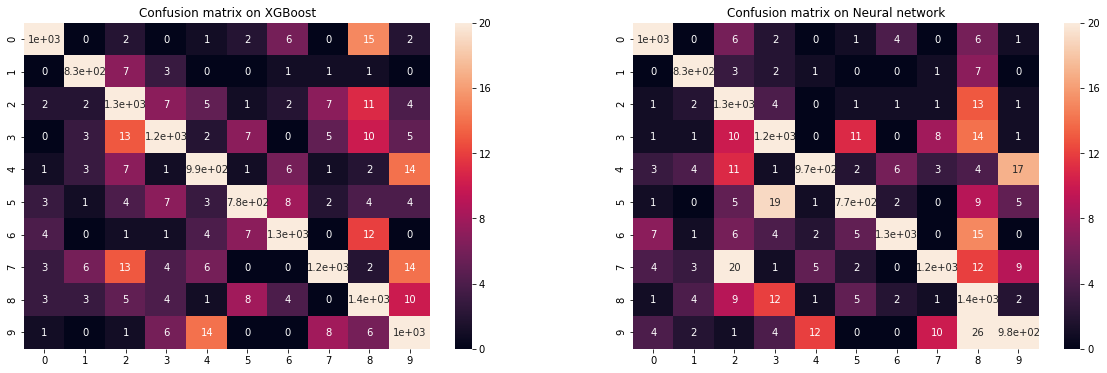

In [108]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.heatmap(conf_matrix_xgb, annot=True, vmin=0, vmax=20)
plt.title("Confusion matrix on XGBoost")
plt.subplot(122)
sns.heatmap(conf_matrix_nn, annot=True, vmin=0, vmax=20)
plt.title("Confusion matrix on Neural network")
plt.show()

XGBoost shows (slightly higher accuracy)